In [1]:
%cd /content/drive/MyDrive/multi/0426

/content/drive/MyDrive/multi/0426


### 로지스틱 회귀 - 분류

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# sigmoid 함수

def sigmoid(x, a=1, b=0):
    return 1. / (1 + np.exp(-a*(x-b)))

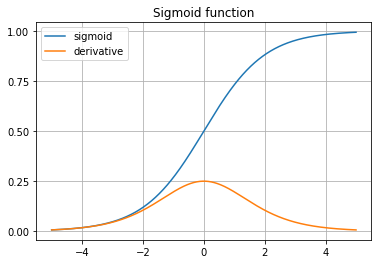

In [13]:
xs = np.linspace(-5,5,1001)
ys = sigmoid(xs)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, ys*(1-ys), label='derivative')
plt.title('Sigmoid function')
plt.yticks([0,0.25,0.5,0.75,1.0])
plt.grid()
plt.legend()
plt.show()

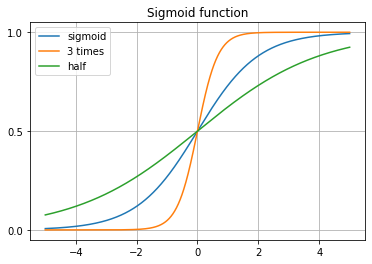

In [15]:
y3 = sigmoid(xs, a=3)
y_half = sigmoid(xs, a=0.5)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y3, label='3 times')
plt.plot(xs, y_half, label='half')
plt.title('Sigmoid function')
plt.yticks([0,0.5,1])
plt.grid()
plt.legend()
plt.show()

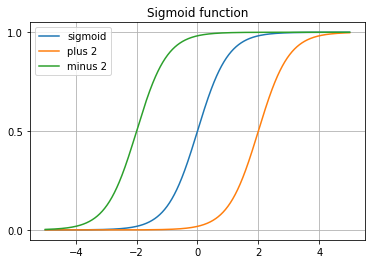

In [16]:
ys = sigmoid(xs, a=2)
y_plus2 = sigmoid(xs, a=2, b=2)
y_minus2 = sigmoid(xs, a=2, b=-2)
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, y_plus2, label='plus 2')
plt.plot(xs, y_minus2, label='minus 2')
plt.title('Sigmoid function')
plt.yticks([0,0.5,1])
plt.grid()
plt.legend()
plt.show()

### 이진 분류
- sigmoid 함수 이용

In [94]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

In [95]:
# 로지스틱 회귀를 사용하려면 정규화/표준화를 해야한다.
from sklearn.preprocessing import StandardScaler

cancer_std = StandardScaler().fit_transform(cancer.data)

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    cancer_std,
    cancer.target,
    stratify=cancer.target, 
    random_state=2022
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [97]:
from sklearn.linear_model import LogisticRegression

lrc = LogisticRegression(random_state=2022)
lrc.fit(X_train, y_train)

LogisticRegression(random_state=2022)

In [98]:
lrc.coef_

array([[-0.34405498, -0.48237478, -0.3341254 , -0.42915846, -0.07879762,
         0.56207448, -0.73975027, -0.60531031,  0.04342698,  0.15496439,
        -1.25355709,  0.01114107, -0.78491641, -0.96111243, -0.26653613,
         0.90404346,  0.08264883, -0.33151113,  0.57540241,  0.435543  ,
        -0.9384629 , -1.11676756, -0.79996886, -0.95345339, -0.66727363,
         0.18915746, -0.93918052, -1.03420112, -1.16072205, -0.16299362]])

In [101]:
# 절편
lrc.intercept_

array([0.18666884])

In [102]:
X_test[0]

array([-0.60418105, -0.84697064, -0.61863699, -0.60178112,  0.06189392,
       -0.61954251, -0.59371599, -0.78127769,  0.97619425, -0.44195364,
       -0.64269945,  0.069211  , -0.70544794, -0.53193707, -0.35734079,
       -0.41124299, -0.39203923, -0.77360013, -0.0995627 , -0.44932623,
       -0.5382468 , -0.12656597, -0.58026425, -0.54966965,  0.23370693,
       -0.34329308, -0.21823207, -0.58296891,  0.77369434, -0.26077671])

In [107]:
# X_test[0]가 1이 될 확률
# logistic regression의 predict_proba 함수 구현
val = np.dot(lrc.coef_, X_test[0]) + lrc.intercept_
sigmoid(val)[0]

0.9912775730131341

In [106]:
lrc.predict_proba(X_test[:1])[0][1]

0.9912775730131341

### 다중 분류
- sigmoid 대신 softmax 함수 적용

In [108]:
from sklearn.datasets import load_wine

wine=load_wine()
wine_std = StandardScaler().fit_transform(wine.data)
X_train, X_test, y_train, y_test = train_test_split(
    wine_std, wine.target, stratify=wine.target, random_state=2022
)

In [109]:
lrc2 = LogisticRegression(random_state=2022)

lrc2.fit(X_train, y_train)
lrc2.predict(X_test[:5])

array([0, 0, 2, 2, 1])

In [110]:
lrc2.coef_

array([[ 0.73292343,  0.24529243,  0.4625104 , -0.83327624,  0.03787191,
         0.2198092 ,  0.64010231, -0.16699086,  0.15389364,  0.14377882,
         0.12029171,  0.67911303,  1.0101582 ],
       [-0.91395256, -0.48165767, -0.83332071,  0.59074468, -0.08596402,
        -0.01348885,  0.34230068,  0.17131402,  0.23534429, -0.96864414,
         0.66757359,  0.04717943, -1.09745204],
       [ 0.18102913,  0.23636524,  0.37081031,  0.24253157,  0.04809211,
        -0.20632035, -0.98240299, -0.00432316, -0.38923793,  0.82486532,
        -0.7878653 , -0.72629246,  0.08729384]])

In [111]:
val = np.dot(lrc2.coef_, X_test[0]) + lrc2.intercept_
val

array([ 5.29265972, -2.49869379, -2.79396593])

In [112]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [113]:
softmax(val)

array([9.9927960e-01, 4.1299537e-04, 3.0740443e-04])

In [114]:
lrc2.predict_proba(X_test[:1])

array([[9.9927960e-01, 4.1299537e-04, 3.0740443e-04]])